In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
#Loading Data

from numpy import loadtxt
from urllib.request import urlopen
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(urlopen(url),header=None, names=col_names)


In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6536796536796536


In [15]:
#!apt-get -qq install -y graphviz && pip install pydot
#import pydot
!pip install matplotlib-venn

In [8]:
#Visualizing Decision Trees
#!pip install graphviz
#!pip install pydotplus
# https://pypi.python.org/pypi/pydot
#!apt-get -qq install -y graphviz && pip install pydot
#import pydot
!pip install six
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

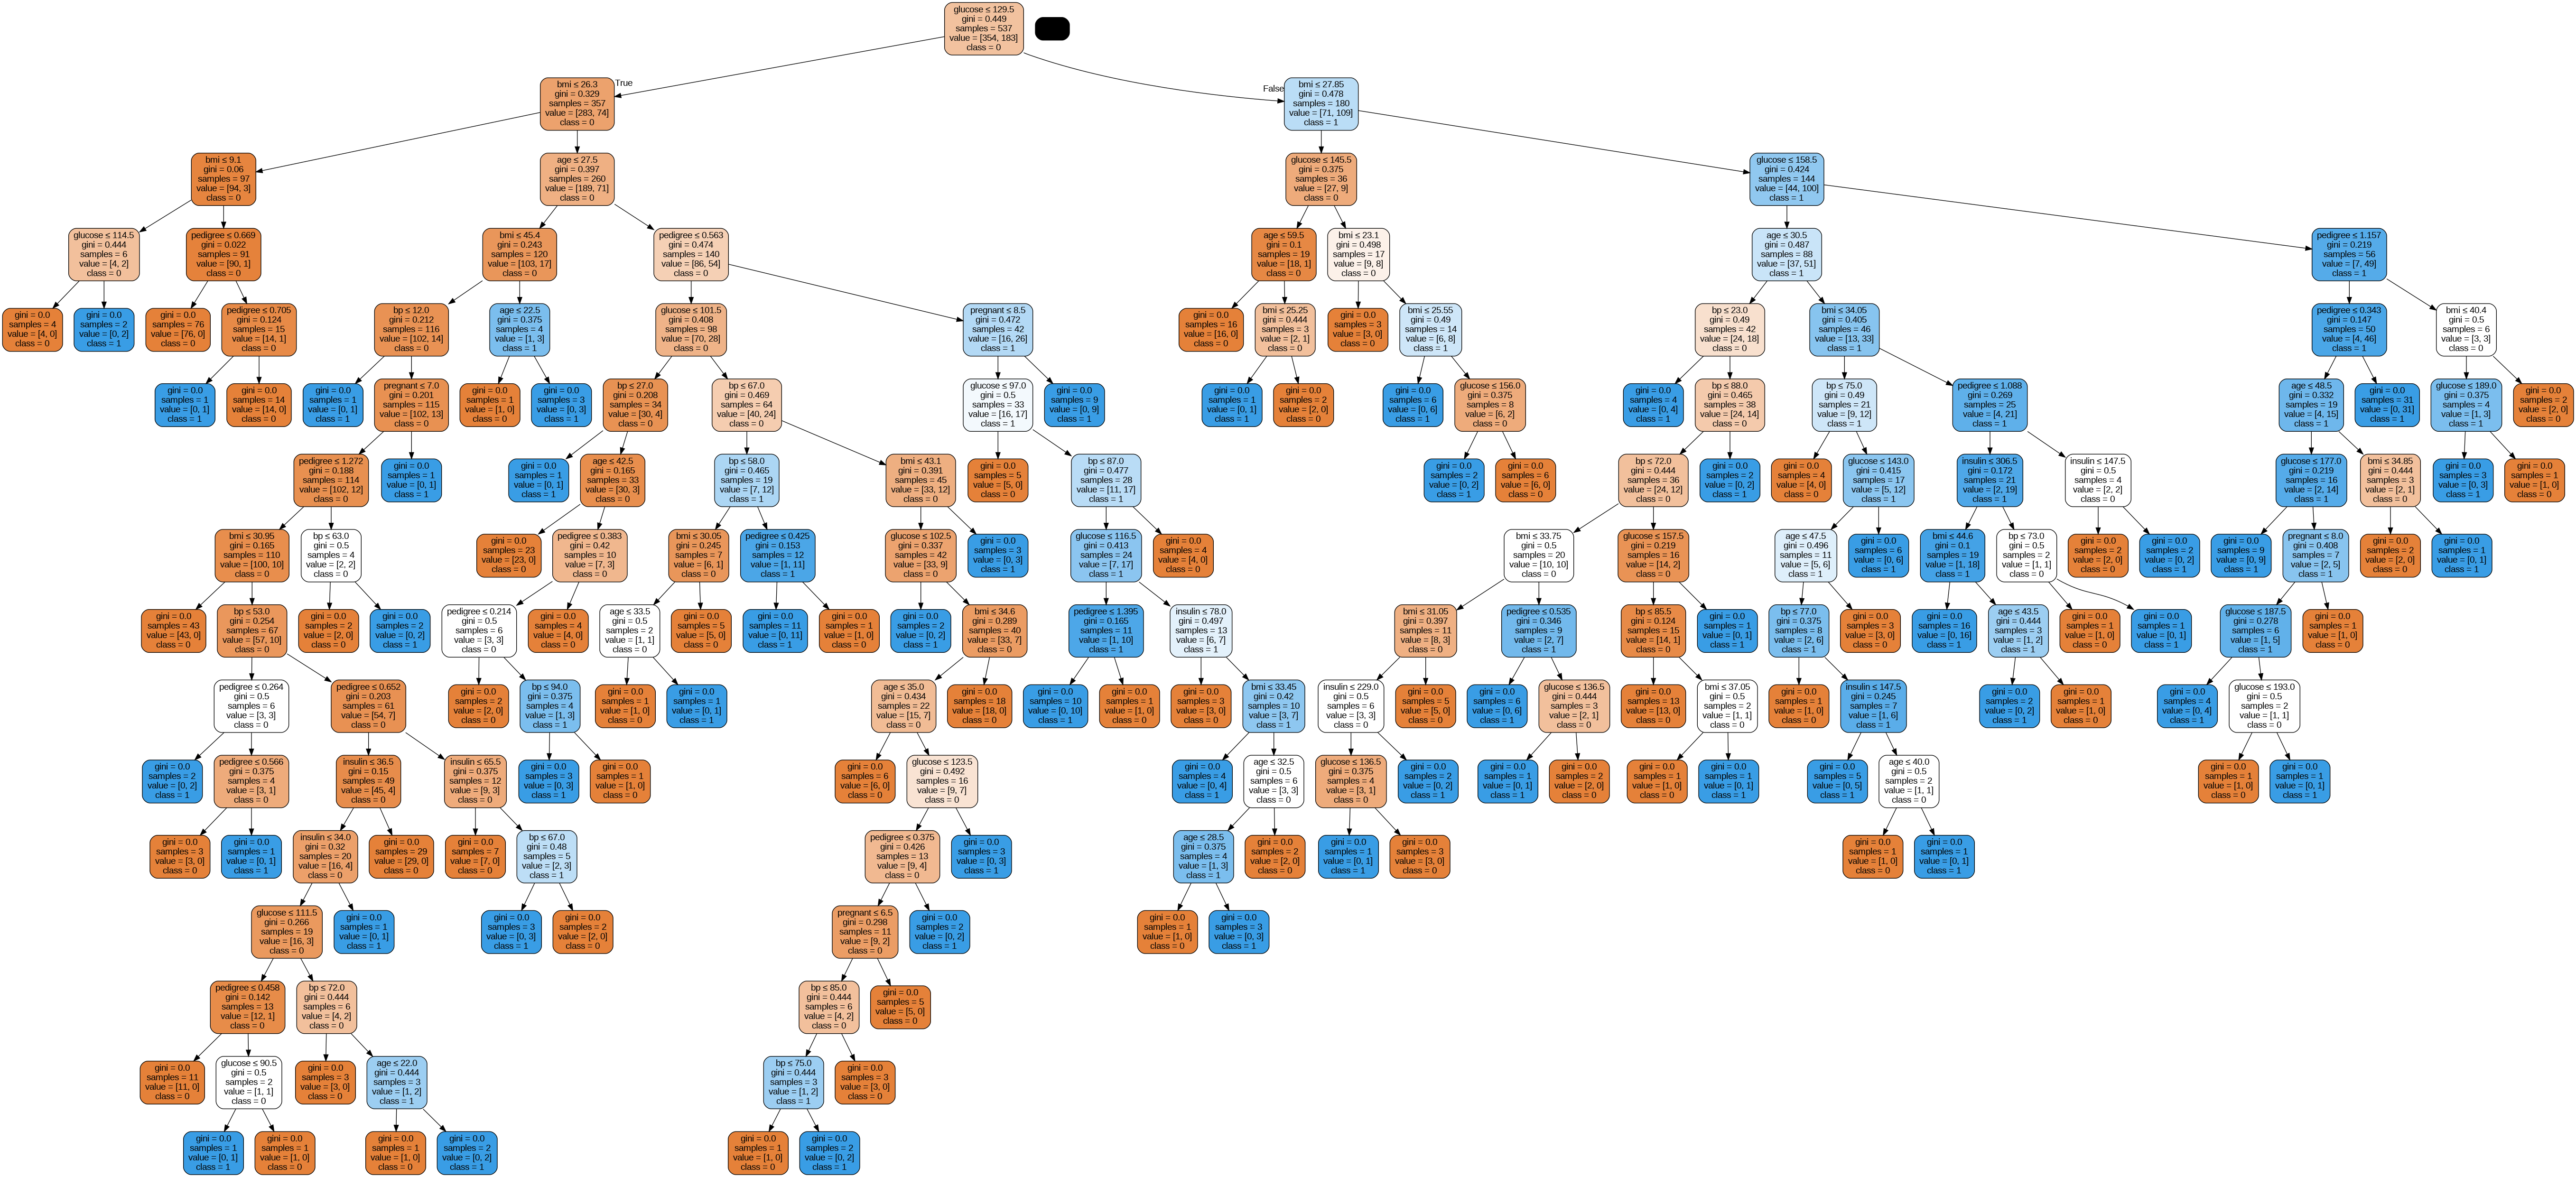

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Optimizing Decision Tree Performance
criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


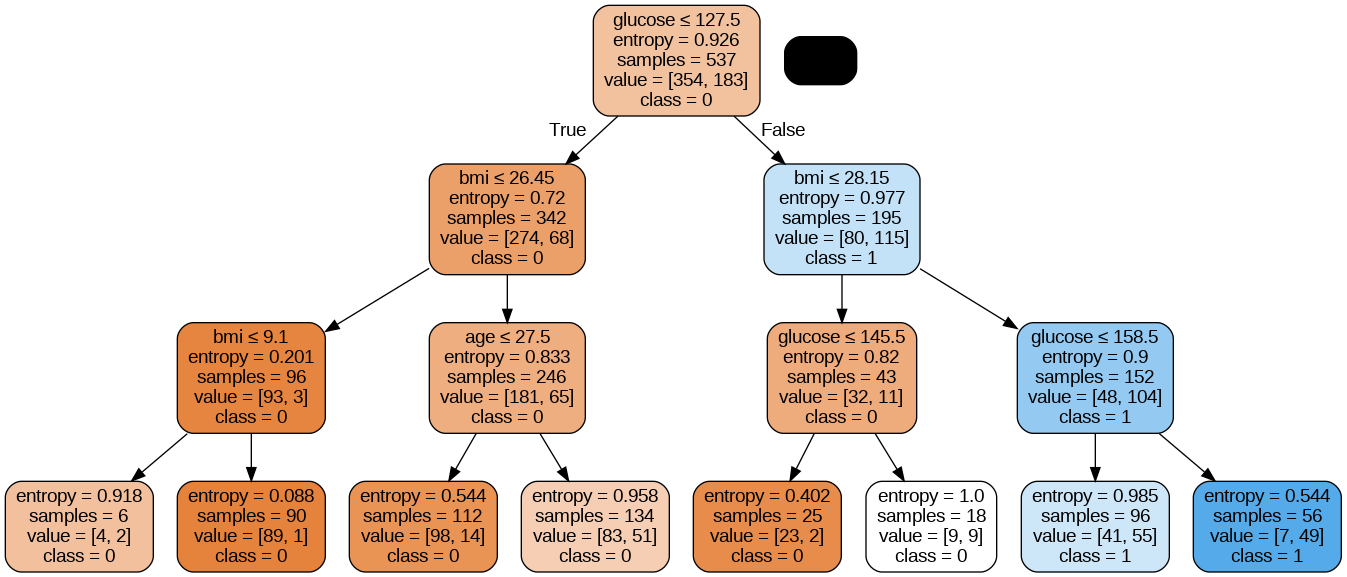

In [24]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

# Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [25]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

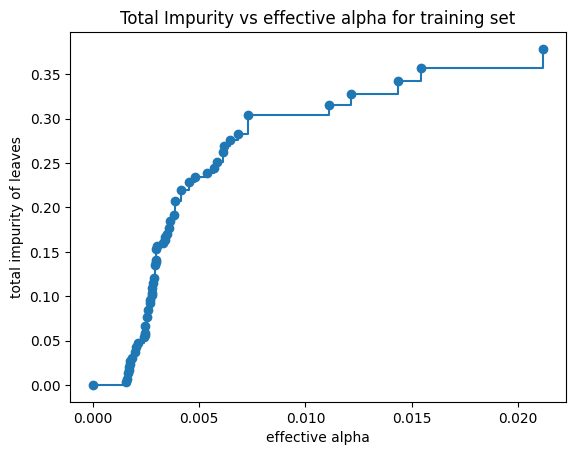

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [30]:
print(ccp_alphas)

[0.         0.00155183 0.00159617 0.00168485 0.00170701 0.00171895
 0.00173805 0.00176419 0.00184173 0.00199036 0.00203149 0.00213623
 0.00239603 0.00248293 0.00248293 0.00248293 0.00253936 0.00260708
 0.00270865 0.00270865 0.0027933  0.0027933  0.0027933  0.00282151
 0.00288729 0.00291802 0.00298748 0.00298748 0.00299761 0.00304159
 0.00331057 0.00338581 0.00341403 0.00351955 0.00357208 0.00362987
 0.00382398 0.00385348 0.00416478 0.00453757 0.00482841 0.00537657
 0.00570325 0.00583738 0.00611563 0.0061912  0.00643788 0.00682078
 0.00732064 0.01112616 0.01216636 0.01433312 0.0154276  0.02118767]


Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07069408803785898


In [33]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0015518311607697084, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0015961691939345574, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0016848452602642547, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001707014276846679, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0017189514396218299, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0017380509000620736, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0017641870038224061, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018417336853091034, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0019903648248252785, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0020314880650076183, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0021362264400026374, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002396027312228429, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002482929857231533, random_state=0),


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

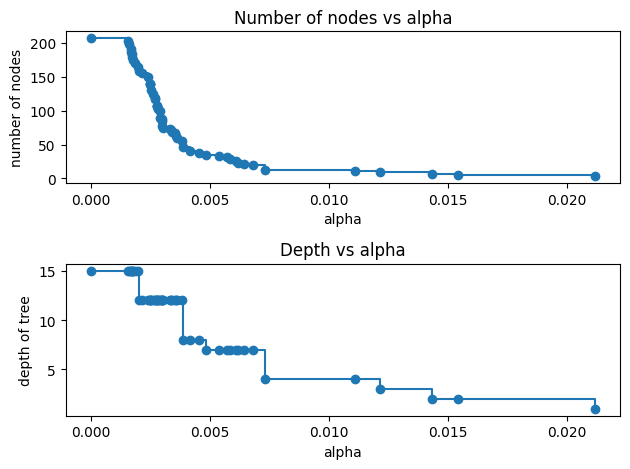

In [28]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Accuracy vs alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.01 maximizes the testing accuracy.

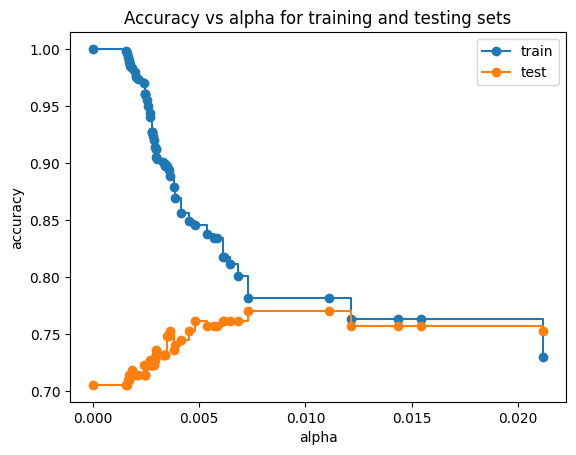

In [29]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [34]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.010)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [35]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7705627705627706

[Text(0.4444444444444444, 0.9, 'x[4] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.2222222222222222, 0.7, 'x[2] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 27.5\ngini = 0.397\nsamples = 260\nvalue = [189, 71]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.243\nsamples = 120\nvalue = [103, 17]'),
 Text(0.4444444444444444, 0.3, 'x[6] <= 0.563\ngini = 0.474\nsamples = 140\nvalue = [86, 54]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.408\nsamples = 98\nvalue = [70, 28]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.472\nsamples = 42\nvalue = [16, 26]'),
 Text(0.6666666666666666, 0.7, 'x[2] <= 27.85\ngini = 0.478\nsamples = 180\nvalue = [71, 109]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(0.7777777777777778, 0.5, 'x[4] <= 158.5\ngini = 0.424\nsamples = 144\nvalue = [44, 100]'),
 Text(0.6666666666666

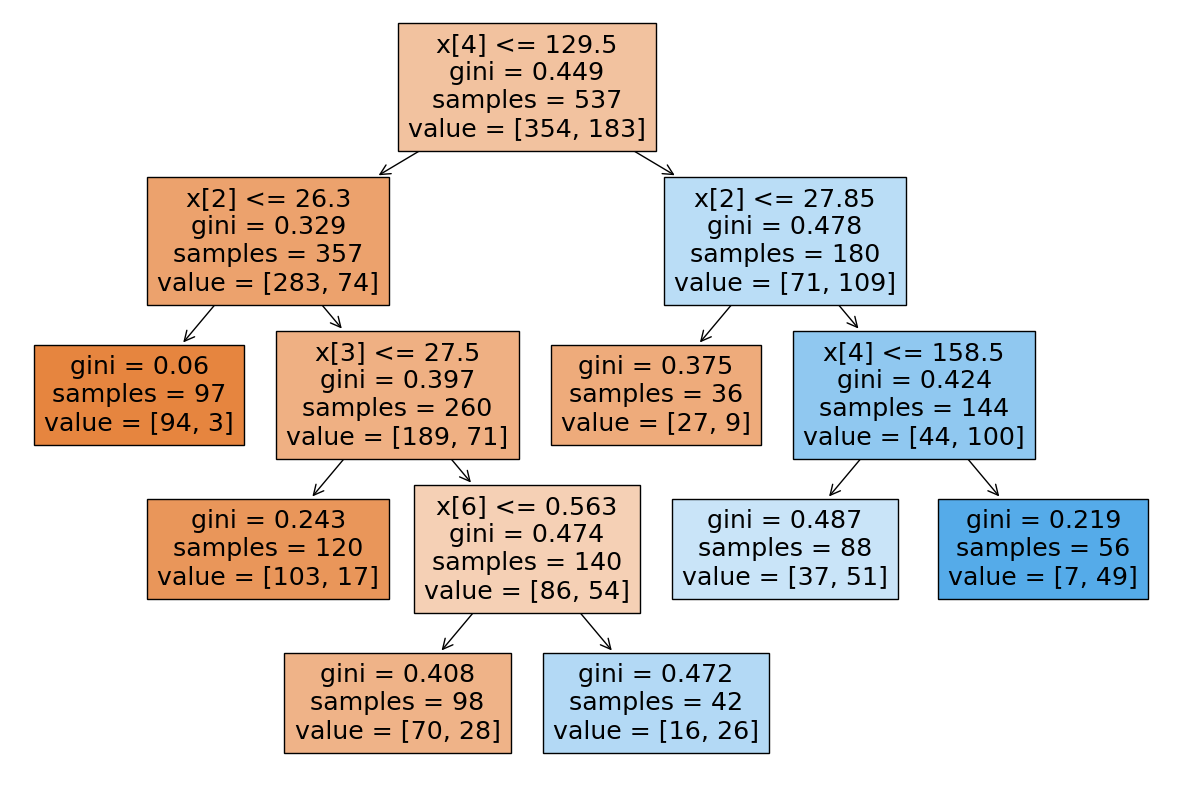

In [36]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=tree)